$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{September 12, 2025}\\\\\
\text{ Prepared by: Vivek Kumar Agarwal}\\\\
\textbf{Recitation 2: Probability 1, 2 and 3}
\end{array}
$$

# Probability - (Based on Lec 3 \& 4)

![Causal Inference](../figures/CI_lab2_image1.png)

---

## Today's Recitation 

- Prob Review
  - Random variables, PMF, PDF, CDF, Expectation, Variance (ref: Notebook for Lab 1).
- Joint Distributions
- Marginal Distributions
- Covariance and Correlation
- Conditional Distributions
- Independence
- Lets Code!!


## Quick Review - Prob 1 

+ Lets look at the previous notebook of [Lab 1](https://github.com/vivekagarwal14/Causal-Inference-Fall-2025--Recitation/blob/main/recitation/Lab1_intro.ipynb)

## Probability 2 - Joint Distributions

## Why Joint Distributions Matter

Imagine you want to understand the relationship between study habits and academic performance. Questions like:
- "If I study more, will my grades improve?"
- "What study patterns will make me successful?"
- "Are study hours and GPA independent, or is there a relationship?"

These questions require understanding how multiple variables behave **together** - this is where joint probability distributions come in.

---


In [1]:
## Simulating  Student Data


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# Simulate student data
n_students = 1000

# Study hours per day: 0-2 (low), 3-5 (medium), 6+ (high)
# Based on realistic student behavior - more students study medium amounts
study_hours_probs = [0.3, 0.5, 0.2]  # Low, Medium, High
study_hours = np.random.choice([0, 1, 2], size=n_students, p=study_hours_probs)

In [3]:
exam_performance = np.zeros(n_students, dtype=int)

for i in range(n_students):
    if study_hours[i] == 0:  # Low study (0-2 hours)
        exam_performance[i] = np.random.choice([0, 1, 2], p=[0.6, 0.3, 0.1])
    elif study_hours[i] == 1:  # Medium study (3-5 hours)
        exam_performance[i] = np.random.choice([0, 1, 2], p=[0.2, 0.5, 0.3])
    else:  # High study (6+ hours)
        exam_performance[i] = np.random.choice([0, 1, 2], p=[0.1, 0.3, 0.6])

print(f"Generated data for {n_students} students")
print(f"Study hours distribution: {np.bincount(study_hours)} students")
print(f"Performance distribution: {np.bincount(exam_performance)} students")

Generated data for 1000 students
Study hours distribution: [319 482 199] students
Performance distribution: [300 402 298] students


### Understanding Joint Probability Mass Function (PMF)

In [4]:
# Create joint frequency table
joint_freq = np.zeros((3, 3))
for s in range(3):
    for e in range(3):
        joint_freq[s, e] = np.sum((study_hours == s) & (exam_performance == e))

# Convert frequencies to probabilities
joint_pmf = joint_freq / n_students

In [5]:
# Create labels
study_labels = ['Low (0-2h)', 'Medium (3-5h)', 'High (6+h)']
performance_labels = ['Poor (D-F)', 'Average (B-C)', 'Excellent (A)']

# Display as a clear table
joint_df = pd.DataFrame(joint_pmf, 
                       index=study_labels,
                       columns=performance_labels)

print("JOINT PROBABILITY MASS FUNCTION")
print("Each cell shows P(Study = row, Performance = column)")
print(joint_df.round(3))
print(f"\nVerification: Sum of all probabilities = {joint_pmf.sum():.3f}")

JOINT PROBABILITY MASS FUNCTION
Each cell shows P(Study = row, Performance = column)
               Poor (D-F)  Average (B-C)  Excellent (A)
Low (0-2h)          0.187          0.102          0.030
Medium (3-5h)       0.096          0.243          0.143
High (6+h)          0.017          0.057          0.125

Verification: Sum of all probabilities = 1.000


### Visualizing the Joint Distribution

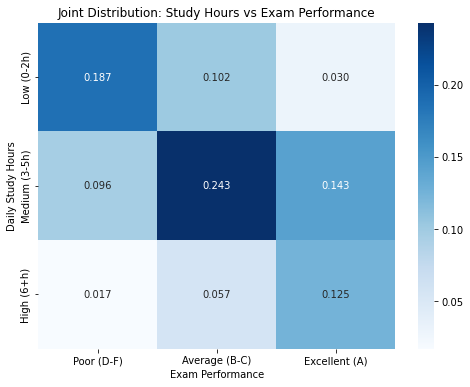

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(joint_df, annot=True, fmt='.3f', cmap='Blues')
plt.title('Joint Distribution: Study Hours vs Exam Performance')
plt.ylabel('Daily Study Hours')
plt.xlabel('Exam Performance')
plt.show()

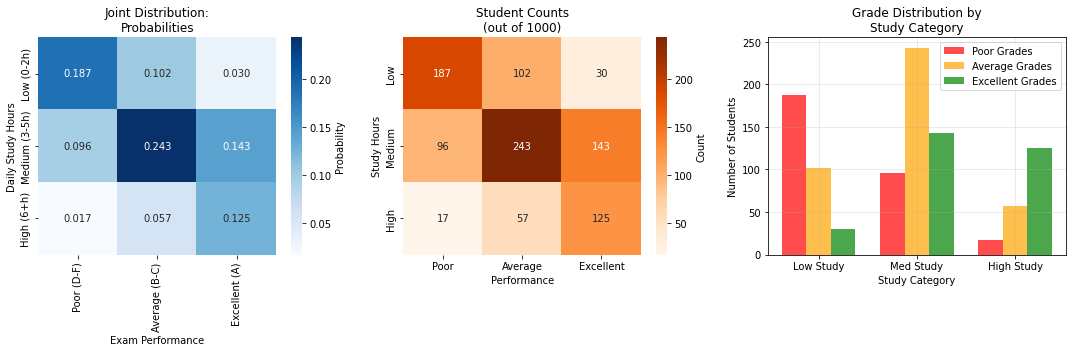


 Quick Insights:
 298 students got excellent grades (A)
 125 of those excellent students studied 6+ hours daily
 That's 41.9% of A students!


In [7]:
plt.figure(figsize=(15, 5))

# Panel 1: Probability heatmap
plt.subplot(1, 3, 1)
sns.heatmap(joint_df, annot=True, fmt='.3f', cmap='Blues', 
            cbar_kws={'label': 'Probability'})
plt.title('Joint Distribution:\nProbabilities')
plt.ylabel('Daily Study Hours')
plt.xlabel('Exam Performance')

# Panel 2: Raw counts 
plt.subplot(1, 3, 2)
# Create a simpler counts visualization
counts_df = pd.DataFrame(joint_freq.astype(int), 
                        index=['Low', 'Medium', 'High'],
                        columns=['Poor', 'Average', 'Excellent'])
sns.heatmap(counts_df, annot=True, fmt='d', cmap='Oranges',
            cbar_kws={'label': 'Count'})
plt.title('Student Counts\n(out of 1000)')
plt.ylabel('Study Hours')
plt.xlabel('Performance')

# Panel 3: Bar chart 
plt.subplot(1, 3, 3)
# Show relationship as grouped bars
categories = ['Low Study', 'Med Study', 'High Study'] 
poor_counts = [joint_freq[0,0], joint_freq[1,0], joint_freq[2,0]]
avg_counts = [joint_freq[0,1], joint_freq[1,1], joint_freq[2,1]]
exc_counts = [joint_freq[0,2], joint_freq[1,2], joint_freq[2,2]]

x = np.arange(len(categories))
width = 0.25

plt.bar(x - width, poor_counts, width, label='Poor Grades', color='red', alpha=0.7)
plt.bar(x, avg_counts, width, label='Average Grades', color='orange', alpha=0.7)
plt.bar(x + width, exc_counts, width, label='Excellent Grades', color='green', alpha=0.7)

plt.xlabel('Study Category')
plt.ylabel('Number of Students')
plt.title('Grade Distribution by\nStudy Category')
plt.xticks(x, categories)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key insights
total_high_performers = joint_freq[:, 2].sum()
high_study_high_perform = joint_freq[2, 2]
print(f"\n Quick Insights:")
print(f" {total_high_performers:.0f} students got excellent grades (A)")
print(f" {high_study_high_perform:.0f} of those excellent students studied 6+ hours daily")
print(f" That's {100*high_study_high_perform/total_high_performers:.1f}% of A students!")

## Marginal Distributions - "Ignoring everything else, how are students distributed?"

In [8]:
# Calculate marginal distributions
marginal_study = joint_pmf.sum(axis=1)      # Sum across performance levels
marginal_performance = joint_pmf.sum(axis=0) # Sum across study levels

print("MARGINAL DISTRIBUTIONS")
print("\nStudy Habits (ignoring grades):")
for i, prob in enumerate(marginal_study):
    print(f"  {study_labels[i]}: {prob:.3f} ({prob*100:.1f}% of students)")

print("\nGrade Distribution (ignoring study habits):")
for i, prob in enumerate(marginal_performance):
    print(f"  {performance_labels[i]}: {prob:.3f} ({prob*100:.1f}% of students)")

MARGINAL DISTRIBUTIONS

Study Habits (ignoring grades):
  Low (0-2h): 0.319 (31.9% of students)
  Medium (3-5h): 0.482 (48.2% of students)
  High (6+h): 0.199 (19.9% of students)

Grade Distribution (ignoring study habits):
  Poor (D-F): 0.300 (30.0% of students)
  Average (B-C): 0.402 (40.2% of students)
  Excellent (A): 0.298 (29.8% of students)


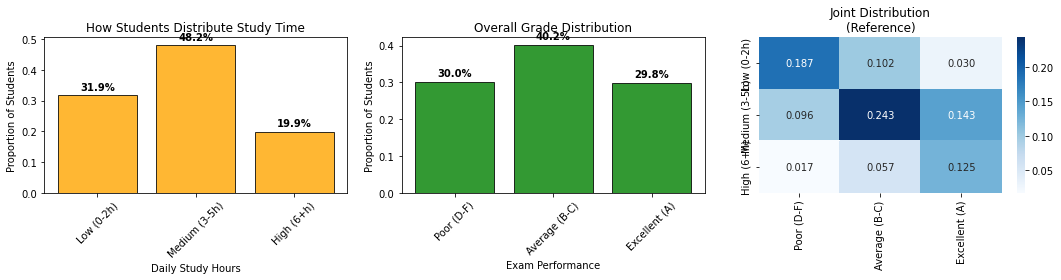


Marginal Distribution Insights:
 Most students (48.2%) study moderately (3-5 hours)
 Only 19.9% are 'heavy studiers' (6+ hours)
 30.0% struggle with grades (D-F range)
 29.8% achieve excellent performance (A grades)


In [9]:
# Visualize marginals
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
bars1 = plt.bar(range(len(study_labels)), marginal_study, alpha=0.8, 
                color='orange', edgecolor='black')
plt.title('How Students Distribute Study Time')
plt.xlabel('Daily Study Hours')
plt.ylabel('Proportion of Students')
plt.xticks(range(len(study_labels)), study_labels, rotation=45)
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{marginal_study[i]*100:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 2)
bars2 = plt.bar(range(len(performance_labels)), marginal_performance, alpha=0.8, 
                color='green', edgecolor='black')
plt.title('Overall Grade Distribution')
plt.xlabel('Exam Performance')
plt.ylabel('Proportion of Students')
plt.xticks(range(len(performance_labels)), performance_labels, rotation=45)
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{marginal_performance[i]*100:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 3)
sns.heatmap(joint_df, annot=True, fmt='.3f', cmap='Blues')
plt.title('Joint Distribution\n(Reference)')

plt.tight_layout()
plt.show()

print(f"\nMarginal Distribution Insights:")
print(f" Most students ({marginal_study[1]*100:.1f}%) study moderately (3-5 hours)")
print(f" Only {marginal_study[2]*100:.1f}% are 'heavy studiers' (6+ hours)")
print(f" {marginal_performance[0]*100:.1f}% struggle with grades (D-F range)")
print(f" {marginal_performance[2]*100:.1f}% achieve excellent performance (A grades)")

## Conditional Distributions: Answering "What If?" Questions

Conditional distributions help answer specific student questions.

In [10]:
# Question 1: "If I study 6+ hours daily, what are my chances of getting an A?"
high_study_index = 2
conditional_performance_given_high_study = joint_pmf[high_study_index, :] / marginal_study[high_study_index]

print("\nQuestion 1: 'If I study 6+ hours daily, what are my grade chances?'")
for i, prob in enumerate(conditional_performance_given_high_study):
    print(f"   P({performance_labels[i]} | High Study) = {prob:.3f} ({prob*100:.1f}%)")


Question 1: 'If I study 6+ hours daily, what are my grade chances?'
   P(Poor (D-F) | High Study) = 0.085 (8.5%)
   P(Average (B-C) | High Study) = 0.286 (28.6%)
   P(Excellent (A) | High Study) = 0.628 (62.8%)


In [11]:
# Question 2: "Among A students, what were their study habits?"
excellent_performance_index = 2
conditional_study_given_excellent = joint_pmf[:, excellent_performance_index] / marginal_performance[excellent_performance_index]

print(f"\nQuestion 2: 'Among A students, what were their study habits?'")
for i, prob in enumerate(conditional_study_given_excellent):
    print(f"   P({study_labels[i]} | A Grade) = {prob:.3f} ({prob*100:.1f}%)")


Question 2: 'Among A students, what were their study habits?'
   P(Low (0-2h) | A Grade) = 0.101 (10.1%)
   P(Medium (3-5h) | A Grade) = 0.480 (48.0%)
   P(High (6+h) | A Grade) = 0.419 (41.9%)


In [12]:
# Question 3: "If I only study minimally, what should I expect?"
low_study_index = 0
conditional_performance_given_low_study = joint_pmf[low_study_index, :] / marginal_study[low_study_index]

print(f"\nQuestion 3: 'If I only study 0-2 hours daily, what should I expect?'")
for i, prob in enumerate(conditional_performance_given_low_study):
    print(f"   P({performance_labels[i]} | Low Study) = {prob:.3f} ({prob*100:.1f}%)")


Question 3: 'If I only study 0-2 hours daily, what should I expect?'
   P(Poor (D-F) | Low Study) = 0.586 (58.6%)
   P(Average (B-C) | Low Study) = 0.320 (32.0%)
   P(Excellent (A) | Low Study) = 0.094 (9.4%)


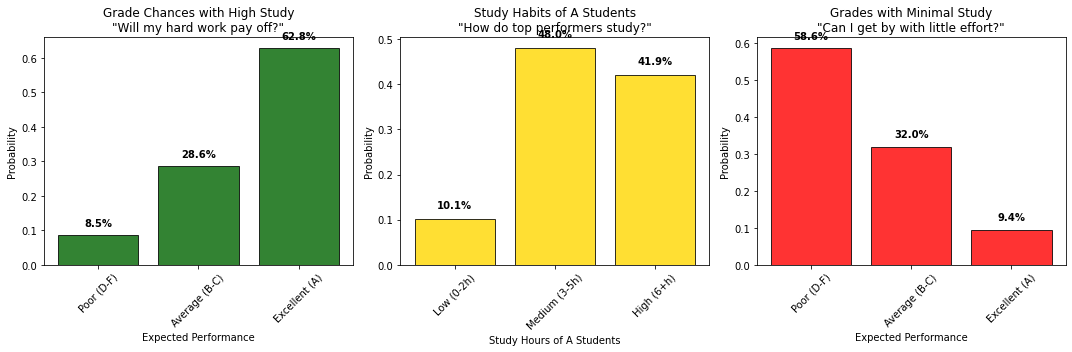


Key Takeaways for Students:
 High study effort → 62.8% chance of A grade
 Low study effort → 58.6% chance of poor grade
 41.9% of A students were high studiers
 Only 10.1% of A students studied minimally


In [13]:
# Visualize the answers to above questions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
bars1 = plt.bar(range(len(performance_labels)), conditional_performance_given_high_study, 
                alpha=0.8, color='darkgreen', edgecolor='black')
plt.title('Grade Chances with High Study\n"Will my hard work pay off?"')
plt.xlabel('Expected Performance')
plt.ylabel('Probability')
plt.xticks(range(len(performance_labels)), performance_labels, rotation=45)
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{conditional_performance_given_high_study[i]*100:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 2)
bars2 = plt.bar(range(len(study_labels)), conditional_study_given_excellent, 
                alpha=0.8, color='gold', edgecolor='black')
plt.title('Study Habits of A Students\n"How do top performers study?"')
plt.xlabel('Study Hours of A Students')
plt.ylabel('Probability')
plt.xticks(range(len(study_labels)), study_labels, rotation=45)
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{conditional_study_given_excellent[i]*100:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 3, 3)
bars3 = plt.bar(range(len(performance_labels)), conditional_performance_given_low_study, 
                alpha=0.8, color='red', edgecolor='black')
plt.title('Grades with Minimal Study\n"Can I get by with little effort?"')
plt.xlabel('Expected Performance')
plt.ylabel('Probability')
plt.xticks(range(len(performance_labels)), performance_labels, rotation=45)
for i, bar in enumerate(bars3):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{conditional_performance_given_low_study[i]*100:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nKey Takeaways for Students:")
print(f" High study effort → {conditional_performance_given_high_study[2]*100:.1f}% chance of A grade")
print(f" Low study effort → {conditional_performance_given_low_study[0]*100:.1f}% chance of poor grade")
print(f" {conditional_study_given_excellent[2]*100:.1f}% of A students were high studiers")
print(f" Only {conditional_study_given_excellent[0]*100:.1f}% of A students studied minimally")

## Continuous RV: Sleep Hours vs GPA

Now let's look at continuous variables

In [14]:
# Generate realistic sleep and GPA data
n_students = 1000

# Research shows optimal sleep is around 7-8 hours for academic performance
mean_sleep = 7.2    # Average sleep hours
mean_gpa = 3.0      # Average GPA
std_sleep = 1.5     # Sleep varies more than GPA
std_gpa = 0.6       # GPA has tighter distribution
correlation = 0.35  # Moderate positive correlation (research-based)

In [15]:
# Create covariance matrix
cov_sleep_gpa = correlation * std_sleep * std_gpa
cov_matrix = [[std_sleep**2, cov_sleep_gpa],
              [cov_sleep_gpa, std_gpa**2]]

## Covariance is a measure of the linear relationship between two variables.

\begin{align}
Cov(X, Y)
= E[(X - E[X])(Y - E[Y])]
= E[XY] - E[X]E[Y]
\end{align}


\begin{align}
Cov(X, Y) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_x)(y_i - \mu_y)
\end{align}


$$
Cov(X, Y) = Cov(Y, X)
$$

$$
Cov(X, a) = 0
$$

$$
Cov(X+Y, Z) = Cov(X, Z) + Cov(Y, Z)
$$

$$
Cov(a+bX, Y) = bCov(X, Y)
$$

In [16]:
# Generate the joint distribution
rv = multivariate_normal([mean_sleep, mean_gpa], cov_matrix)

# Create grid for visualization
sleep_range = np.linspace(3, 11, 100)  # 3 to 11 hours of sleep
gpa_range = np.linspace(1.0, 4.0, 100)  # 1.0 to 4.0 GPA
Sleep, GPA = np.meshgrid(sleep_range, gpa_range)
pos = np.dstack((Sleep, GPA))
pdf_values = rv.pdf(pos)

In [17]:
# Generate sample data
samples = rv.rvs(n_students)
sleep_data = np.clip(samples[:, 0], 3, 11)  # Realistic sleep bounds
gpa_data = np.clip(samples[:, 1], 0, 4.0)   # GPA bounds

print(f"Generated data for {n_students} students")
print(f"Sleep: {sleep_data.mean():.1f} ± {sleep_data.std():.1f} hours")
print(f"GPA: {gpa_data.mean():.2f} ± {gpa_data.std():.2f}")
print(f"Actual correlation: {np.corrcoef(sleep_data, gpa_data)[0,1]:.3f}")

Generated data for 1000 students
Sleep: 7.2 ± 1.5 hours
GPA: 3.01 ± 0.57
Actual correlation: 0.319


## Conditional Distribution

$$
\mathbb{E}\left[Y \mid X=x_i\right]=\sum_{j=1}^k y_j P\left(Y=y_j \mid X=x_i\right)
$$

$$
\mathbb{E}[Y \mid X=x]=\int_{-\infty}^{\infty} y f(y \mid x) d y
$$

1. $E[g(X) + h(X)Y \mid X] = g(X) + h(X)E[Y \mid X]$

2. $E[Y + Z \mid X] = E[Y \mid X] + E[Z \mid X]$

3. If $Y \leq Z$ (always), then $E[Y \mid X] \leq E[Z \mid X]$


+ $\mathbb{E}$ is a linear operator

### Visualizing Continuous Joint Distribution

<ipython-input-18-4e0717d39217>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 3, 1, projection='3d')


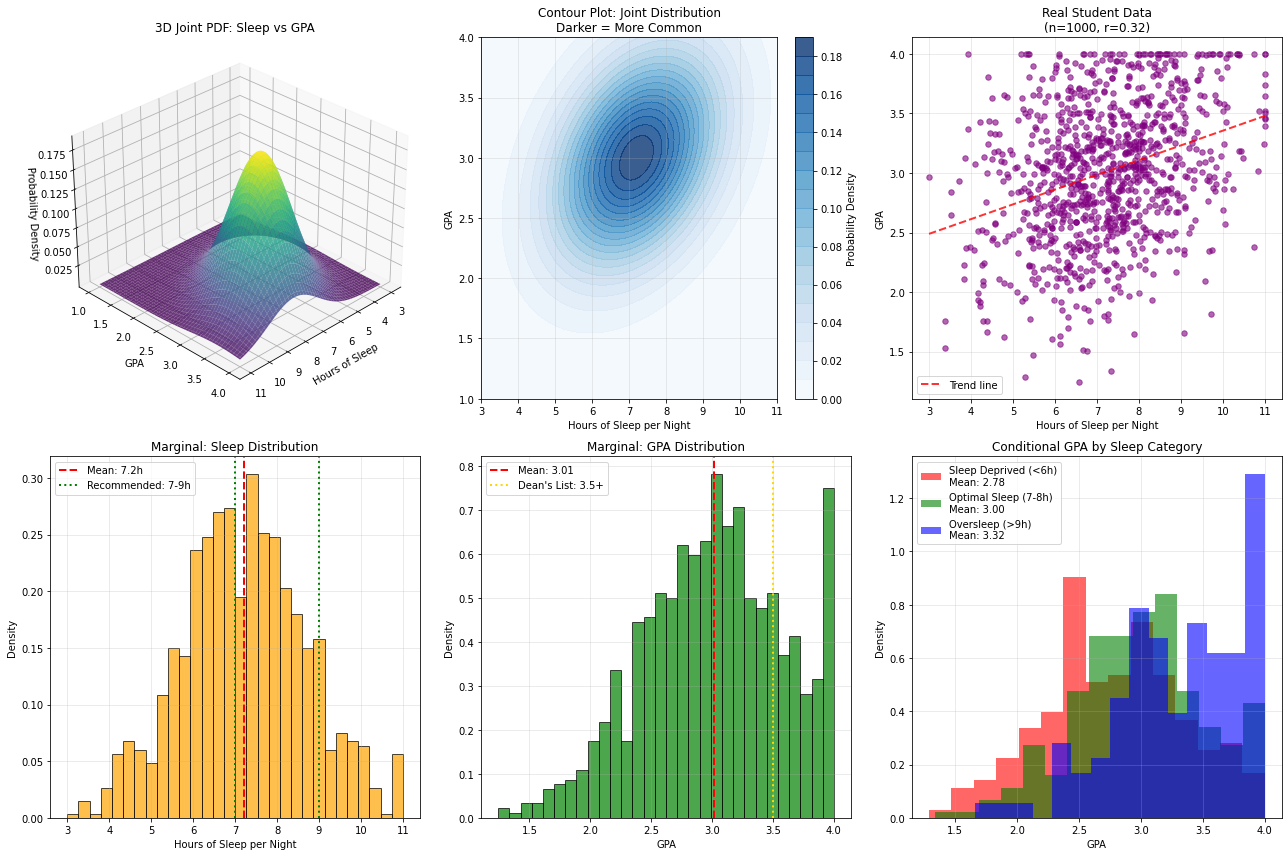


Sleep Category Analysis:
• Sleep Deprived (<6h): 196 students, Average GPA = 2.78
• Optimal Sleep (7-8h): 248 students, Average GPA = 3.00
• Oversleep (>9h): 114 students, Average GPA = 3.32


In [18]:
plt.figure(figsize=(18, 12))

# 3D surface plot
plt.subplot(2, 3, 1)
fig = plt.gcf()
ax = fig.add_subplot(2, 3, 1, projection='3d')
surf = ax.plot_surface(Sleep, GPA, pdf_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('Hours of Sleep')
ax.set_ylabel('GPA')
ax.set_zlabel('Probability Density')
ax.set_title('3D Joint PDF: Sleep vs GPA')
ax.view_init(elev=30, azim=45)  

# Contour plot
plt.subplot(2, 3, 2)
contour = plt.contourf(Sleep, GPA, pdf_values, levels=20, cmap='Blues', alpha=0.8)
plt.colorbar(contour, label='Probability Density')
plt.xlabel('Hours of Sleep per Night')
plt.ylabel('GPA')
plt.title('Contour Plot: Joint Distribution\nDarker = More Common')
plt.grid(True, alpha=0.3)

# Scatter plot of student data
plt.subplot(2, 3, 3)
plt.scatter(sleep_data, gpa_data, alpha=0.6, s=30, color='purple')
plt.xlabel('Hours of Sleep per Night')
plt.ylabel('GPA')
plt.title(f'Real Student Data\n(n={n_students}, r={np.corrcoef(sleep_data, gpa_data)[0,1]:.2f})')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(sleep_data, gpa_data, 1)
p = np.poly1d(z)
plt.plot(sleep_range, p(sleep_range), "r--", alpha=0.8, linewidth=2, 
         label=f'Trend line')
plt.legend()

# Marginal distribution of sleep
plt.subplot(2, 3, 4)
plt.hist(sleep_data, bins=30, density=True, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Hours of Sleep per Night')
plt.ylabel('Density')
plt.title('Marginal: Sleep Distribution')
plt.axvline(sleep_data.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {sleep_data.mean():.1f}h')
plt.axvline(7, color='green', linestyle=':', linewidth=2,
           label='Recommended: 7-9h')
plt.axvline(9, color='green', linestyle=':', linewidth=2)
plt.legend()
plt.grid(True, alpha=0.3)

# Marginal distribution of GPA
plt.subplot(2, 3, 5)
plt.hist(gpa_data, bins=30, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('GPA')
plt.ylabel('Density')
plt.title('Marginal: GPA Distribution')
plt.axvline(gpa_data.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {gpa_data.mean():.2f}')
plt.axvline(3.5, color='gold', linestyle=':', linewidth=2,
           label='Dean\'s List: 3.5+')
plt.legend()
plt.grid(True, alpha=0.3)

# Conditional distributions by sleep category
plt.subplot(2, 3, 6)
sleep_deprived = sleep_data < 6      # Less than 6 hours
optimal_sleep = (sleep_data >= 7) & (sleep_data <= 8)  # 7-8 hours
oversleep = sleep_data > 9           # More than 9 hours

categories = [
    (sleep_deprived, 'Sleep Deprived (<6h)', 'red'),
    (optimal_sleep, 'Optimal Sleep (7-8h)', 'green'),
    (oversleep, 'Oversleep (>9h)', 'blue')
]

for mask, label, color in categories:
    if mask.sum() > 0:  # Only plot if we have data
        plt.hist(gpa_data[mask], bins=15, alpha=0.6, label=f'{label}\nMean: {gpa_data[mask].mean():.2f}', 
                 color=color, density=True)

plt.xlabel('GPA')
plt.ylabel('Density')
plt.title('Conditional GPA by Sleep Category')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of sleep categories
print(f"\nSleep Category Analysis:")
for mask, label, _ in categories:
    if mask.sum() > 0:
        count = mask.sum()
        mean_gpa = gpa_data[mask].mean()
        print(f"• {label}: {count} students, Average GPA = {mean_gpa:.2f}")

## Correlation

Covariance has the unit of the product of the units of the two variables.

X: cm, Y: kg

$$
Cov(X, Y) = 10 (\text{cm} \cdot \text{kg})
$$

Normalization by the standard deviation will give us a unitless quantity.

$$
\rho_{X, Y} = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}}
$$

$$
\rho_{X, Y} \in [-1, 1]
$$

Cauchy-Schwarz Inequality:

$$
|\mathbb{E}[X Y]| \leq \sqrt{\mathbb{E}\left[X^2\right] \cdot \mathbb{E}\left[Y^2\right]}
$$


$$
|\operatorname{Cov}(X, Y)|=|\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]| \leq \sqrt{\mathbb{E}\left[(X-\mathbb{E}[X])^2\right] \cdot \mathbb{E}\left[(Y-\mathbb{E}[Y])^2\right]}
$$


### Interpretation:

If $\rho_{X, Y} = 1$, then $Y = aX + b$ with $a > 0$.

If $\rho_{X, Y} = -1$, then $Y = aX + b$ with $a < 0$.

If $\rho_{X, Y} = 0$, then $X$ and $Y$ are independent, $Y$ is constant to $X$.

## Correlation $\not\implies$ Causation

Causal Graph (DAG)
We can represent this situation with a directed acyclic graph (DAG), where:
- $W=1$ Hot Weather
- $I=1$ Ice Cream Sales
- $D=1$ Drowning Incidents

The causal relationships are:
- $W \rightarrow I$ (Hot weather increases ice cream sales)
- $W \rightarrow D$ (Hot weather increases the likelihood of drowning incidents)

<ipython-input-19-0f44554ae9d0>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


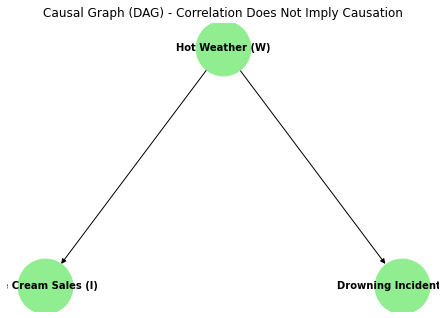

In [19]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Hot Weather (W)")
G.add_node("Ice Cream Sales (I)")
G.add_node("Drowning Incidents (D)")

# Add directed edges representing causal relationships
G.add_edge("Hot Weather (W)", "Ice Cream Sales (I)")
G.add_edge("Hot Weather (W)", "Drowning Incidents (D)")

# Draw the graph
pos = {
    "Hot Weather (W)": (0, 1),
    "Ice Cream Sales (I)": (-1, 0),
    "Drowning Incidents (D)": (1, 0),
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)
plt.tight_layout()

plt.title("Causal Graph (DAG) - Correlation Does Not Imply Causation")
plt.show()


Correlation between Ice Cream Sales and Drowning Incidents: 0.1812
Correlation between Ice Cream Sales and Hot Weather: 0.7026
Correlation between Drowning Incidents and Hot Weather: 0.2395

Drowning rates by Ice Cream Sales:
Ice Cream Sales
0    0.046310
1    0.152104
Name: Drowning Incidents, dtype: float64


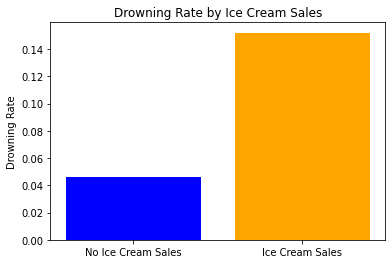

In [20]:
# Number of individuals (or time periods)
n = 1000

# Probability of hot weather
p_hot_weather = 0.3

# Ice cream sales probabilities
p_ice_cream_if_hot = 0.8
p_ice_cream_if_not_hot = 0.1

# Drowning incidents probabilities
p_drowning_if_hot = 0.2
p_drowning_if_not_hot = 0.05

# Simulate Hot Weather
np.random.seed(42)
hot_weather = np.random.binomial(1, p_hot_weather, n)

# Simulate Ice Cream Sales based on weather
ice_cream_sales = np.where(hot_weather == 1,
                           np.random.binomial(1, p_ice_cream_if_hot, n),
                           np.random.binomial(1, p_ice_cream_if_not_hot, n))

# Simulate Drowning Incidents based on weather
drowning_incidents = np.where(hot_weather == 1,
                              np.random.binomial(1, p_drowning_if_hot, n),
                              np.random.binomial(1, p_drowning_if_not_hot, n))

# Create a DataFrame for analysis
df = pd.DataFrame({
    'Hot Weather': hot_weather,
    'Ice Cream Sales': ice_cream_sales,
    'Drowning Incidents': drowning_incidents
})

# Calculate correlations
correlation_ice_drowning = df[['Ice Cream Sales', 'Drowning Incidents']].corr().iloc[0, 1]
correlation_ice_weather = df[['Ice Cream Sales', 'Hot Weather']].corr().iloc[0, 1]
correlation_drowning_weather = df[['Drowning Incidents', 'Hot Weather']].corr().iloc[0, 1]

# Print correlation results
print(f"Correlation between Ice Cream Sales and Drowning Incidents: {correlation_ice_drowning:.4f}")
print(f"Correlation between Ice Cream Sales and Hot Weather: {correlation_ice_weather:.4f}")
print(f"Correlation between Drowning Incidents and Hot Weather: {correlation_drowning_weather:.4f}")

# Grouped statistics to check rates
ice_cream_drowning_rate = df.groupby('Ice Cream Sales')['Drowning Incidents'].mean()
print("\nDrowning rates by Ice Cream Sales:")
print(ice_cream_drowning_rate)

# Plot the results
plt.bar(['No Ice Cream Sales', 'Ice Cream Sales'], ice_cream_drowning_rate, color=['blue', 'orange'])
plt.title('Drowning Rate by Ice Cream Sales')
plt.ylabel('Drowning Rate')
plt.show()


## Law of Iterated Expectations

**"The expectation of the conditional expectation equals the unconditional expectation"**

$$\mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X|Y]]$$

**Intuition**: If you want the overall average of X, you can:
1. Calculate the average of X within each group of Y
2. Then take the weighted average of those group averages

Trivial Proof:

\begin{align}
\mathbb{E}[\mathbb{E}(X \mid Y)] & =\mathbb{E}\left[\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x \mid Y)\right] \\
& =\sum_{y \in \mathcal{Y}}\left[\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x \mid Y=y)\right] \cdot \operatorname{Pr}(Y=y) \\
& =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} x \cdot \operatorname{Pr}(X=x \mid Y=y) \cdot \operatorname{Pr}(Y=y) \\
& =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} x \cdot \operatorname{Pr}(X=x, Y=y) \\
& =\sum_{x \in \mathcal{X}} x \sum_{y \in \mathcal{Y}} \operatorname{Pr}(X=x, Y=y) \\
& =\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x) \\
& =\mathbb{E}(X)
\end{align}


## Conditional Variance


\begin{align}
 \text{Var}(Y|X) &= E[(Y - E[Y|X])^2 | X] \\
 &= E[Y^2|X] - (E[Y|X])^2
\end{align}

#### Student Example: GPA by Major

Let's use a scenario: GPA varies by major, and we want to understand the relationships.


In [21]:

np.random.seed(42)

# Create student data: GPA varies by major
n_students = 1000

# Three majors with different GPA characteristics
majors = ['Engineering', 'Liberal Arts', 'Business']
major_props = [0.4, 0.35, 0.25]  # Proportion of students in each major

# Assign majors
student_majors = np.random.choice(majors, size=n_students, p=major_props)

# Different GPA distributions by major (realistic based on data)
gpa_data = np.zeros(n_students)
for i, student in enumerate(student_majors):
    if student == 'Engineering':
        gpa_data[i] = np.random.normal(3.2, 0.4)  # Lower mean, higher variance (tough curves)
    elif student == 'Liberal Arts':
        gpa_data[i] = np.random.normal(3.4, 0.3)  # Higher mean, lower variance
    else:  # Business
        gpa_data[i] = np.random.normal(3.1, 0.5)  # Lower mean, highest variance
        
# Clip to realistic GPA bounds
gpa_data = np.clip(gpa_data, 0.0, 4.0)

# Create DataFrame
df = pd.DataFrame({
    'major': student_majors,
    'gpa': gpa_data
})

print("Student Data Overview")
print(f"Total students: {n_students}")
print(f"Majors: {majors}")
print(f"\nSample data:")
print(df.head())

# Basic statistics by major
print(f"\nGPA Statistics by Major:")
major_stats = df.groupby('major')['gpa'].agg(['count', 'mean', 'std']).round(3)
print(major_stats)

Student Data Overview
Total students: 1000
Majors: ['Engineering', 'Liberal Arts', 'Business']

Sample data:
          major       gpa
0   Engineering  3.271080
1      Business  2.432328
2  Liberal Arts  3.514059
3  Liberal Arts  3.583176
4   Engineering  3.423916

GPA Statistics by Major:
              count   mean    std
major                            
Business        243  3.079  0.486
Engineering     421  3.244  0.383
Liberal Arts    336  3.447  0.291


#### Law of Iterated Expectation (LIE)

#### Based on the formula we saw above
$$\mathbb{E}[GPA] = \mathbb{E}[\mathbb{E}[GPA|Major]]$$

In [22]:
# Method 1: Direct calculation of overall mean
overall_mean_direct = df['gpa'].mean()
print(f"Direct overall GPA mean: {overall_mean_direct:.4f}")

# Method 2: Using LIE - weighted average of conditional means
major_means = df.groupby('major')['gpa'].mean()
major_counts = df.groupby('major').size()
major_proportions = major_counts / n_students

# LIE calculation: E[E[Y|X]] = Σ P(X=x) * E[Y|X=x]
lie_mean = (major_proportions * major_means).sum()
print(f"LIE calculation: {lie_mean:.4f}")

print(f"\nBreakdown:")
for major in majors:
    prop = major_proportions[major]
    mean = major_means[major]
    contribution = prop * mean
    print(f"• {major}: {prop:.3f} × {mean:.3f} = {contribution:.4f}")

print(f"\nDifference: {abs(overall_mean_direct - lie_mean):.6f} ≈ 0 ✓")


Direct overall GPA mean: 3.2721
LIE calculation: 3.2721

Breakdown:
• Engineering: 0.421 × 3.244 = 1.3657
• Liberal Arts: 0.336 × 3.447 = 1.1582
• Business: 0.243 × 3.079 = 0.7482

Difference: 0.000000 ≈ 0 ✓


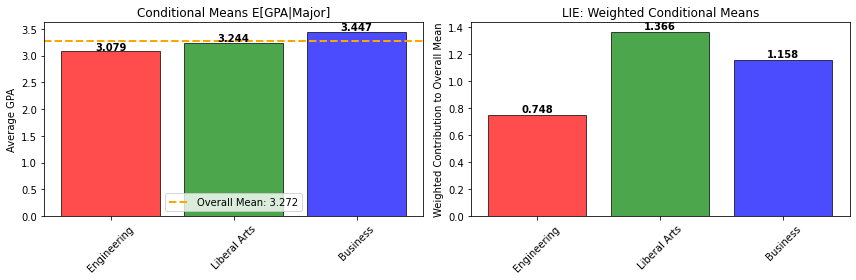

In [23]:
# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# Show conditional means
bars = plt.bar(majors, major_means, alpha=0.7, 
               color=['red', 'green', 'blue'], edgecolor='black')
plt.axhline(overall_mean_direct, color='orange', linestyle='--', linewidth=2,
           label=f'Overall Mean: {overall_mean_direct:.3f}')
plt.ylabel('Average GPA')
plt.title('Conditional Means E[GPA|Major]')
plt.legend()
plt.xticks(rotation=45)
for bar, mean in zip(bars, major_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{mean:.3f}', ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
# Show the weighting
bars = plt.bar(majors, major_proportions * major_means, alpha=0.7,
               color=['red', 'green', 'blue'], edgecolor='black')
plt.ylabel('Weighted Contribution to Overall Mean')
plt.title('LIE: Weighted Conditional Means')
plt.xticks(rotation=45)
for bar, contrib in zip(bars, major_proportions * major_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{contrib:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Conditional Variance: Two Equivalent Formulas

### Formula 1: Definition
$\text{Var}(Y|X) = \mathbb{E}[(Y - \mathbb{E}[Y|X])^2 | X]$

### Formula 2: Computational Form
$\text{Var}(Y|X) = \mathbb{E}[Y^2|X] - (\mathbb{E}[Y|X])^2$

**Second form is useful**:  easier to calculate, especially with data!


Verifying: Var(Y|X) = E[Y²|X] - (E[Y|X])²

For each major:

 Engineering:
  Method 1: E[(Y-E[Y|X])²|X] = 0.146518
  Method 2: E[Y²|X] - (E[Y|X])² = 0.146518
  Difference: 0.00000000 ≈ 0 
  Components: E[Y²|X]=10.6694, (E[Y|X])²=10.5229

 Liberal Arts:
  Method 1: E[(Y-E[Y|X])²|X] = 0.084268
  Method 2: E[Y²|X] - (E[Y|X])² = 0.084268
  Difference: 0.00000000 ≈ 0 
  Components: E[Y²|X]=11.9667, (E[Y|X])²=11.8825

 Business:
  Method 1: E[(Y-E[Y|X])²|X] = 0.235065
  Method 2: E[Y²|X] - (E[Y|X])² = 0.235065
  Difference: 0.00000000 ≈ 0 
  Components: E[Y²|X]=9.7164, (E[Y|X])²=9.4813


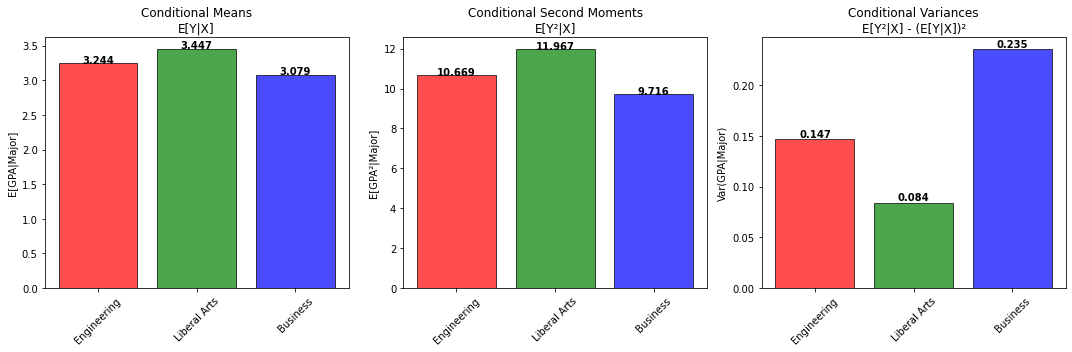


 Key Insight:
The computational formula E[Y²|X] - (E[Y|X])² is often easier
to calculate, especially when working with grouped data!


In [24]:
# Let's verify both formulas give the same result
print("Verifying: Var(Y|X) = E[Y²|X] - (E[Y|X])²")
print("\nFor each major:")

for major in majors:
    major_data = df[df['major'] == major]['gpa']
    
    # Method 1: Definition formula
    conditional_mean = major_data.mean()
    var_method1 = ((major_data - conditional_mean)**2).mean()
    
    # Method 2: Computational formula  
    e_y_squared = (major_data**2).mean()  # E[Y²|X]
    e_y_squared_formula = conditional_mean**2  # (E[Y|X])²
    var_method2 = e_y_squared - e_y_squared_formula
    
    print(f"\n {major}:")
    print(f"  Method 1: E[(Y-E[Y|X])²|X] = {var_method1:.6f}")
    print(f"  Method 2: E[Y²|X] - (E[Y|X])² = {var_method2:.6f}")
    print(f"  Difference: {abs(var_method1 - var_method2):.8f} ≈ 0 ")
    
    # Show the components
    print(f"  Components: E[Y²|X]={e_y_squared:.4f}, (E[Y|X])²={e_y_squared_formula:.4f}")

# Visual demonstration
plt.figure(figsize=(15, 5))

# Panel 1: Show E[Y|X] for each group
plt.subplot(1, 3, 1)
conditional_means = [df[df['major'] == major]['gpa'].mean() for major in majors]
bars = plt.bar(majors, conditional_means, alpha=0.7, 
               color=['red', 'green', 'blue'], edgecolor='black')
plt.ylabel('E[GPA|Major]')
plt.title('Conditional Means\nE[Y|X]')
plt.xticks(rotation=45)
for bar, mean in zip(bars, conditional_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{mean:.3f}', ha='center', fontweight='bold')

# Panel 2: Show E[Y²|X] for each group
plt.subplot(1, 3, 2)
conditional_y_squared = [((df[df['major'] == major]['gpa'])**2).mean() for major in majors]
bars = plt.bar(majors, conditional_y_squared, alpha=0.7,
               color=['red', 'green', 'blue'], edgecolor='black')
plt.ylabel('E[GPA²|Major]')
plt.title('Conditional Second Moments\nE[Y²|X]')
plt.xticks(rotation=45)
for bar, val in zip(bars, conditional_y_squared):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{val:.3f}', ha='center', fontweight='bold')

# Panel 3: Show the variance calculation
plt.subplot(1, 3, 3)
conditional_variances = []
for i, major in enumerate(majors):
    var = conditional_y_squared[i] - conditional_means[i]**2
    conditional_variances.append(var)

bars = plt.bar(majors, conditional_variances, alpha=0.7,
               color=['red', 'green', 'blue'], edgecolor='black')
plt.ylabel('Var(GPA|Major)')
plt.title('Conditional Variances\nE[Y²|X] - (E[Y|X])²')
plt.xticks(rotation=45)
for bar, var in zip(bars, conditional_variances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{var:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n Key Insight:")
print(f"The computational formula E[Y²|X] - (E[Y|X])² is often easier")
print(f"to calculate, especially when working with grouped data!")

## Why learn these Concepts for Causal Inference ?

#### Law of Iterated Expectation:
+ Fundamental for understanding confounding
+ Shows how to 'average out' confounding variables
+ E[Outcome] = E[E[Outcome|Treatment, Confounders]]
+ Used in matching, stratification, and regression

#### Conditional Variance:
+ Helps understand heterogeneous treatment effects
+ Within-group variance → individual-level variation
+ Between-group variance → treatment/group effects
+ Important for effect size interpretation

#### Some Example Applications:
+ Randomized experiments: E[Y|Treatment] vs E[Y]
+ Observational studies: controlling for confounders
+ Heterogeneous effects: different impacts across subgroups
+ Variance decomposition: how much is due to treatment vs noise

##  Independence: 

### Mathematical Definition
Two random variables X and Y are **independent** if:
$P(X \in A, Y \in B) = P(X \in A) \cdot P(Y \in B)$

**Equivalent conditions:**
- $P(Y|X) = P(Y)$ - knowing X tells us nothing about Y
- $P(X|Y) = P(X)$ - knowing Y tells us nothing about X  
- $\mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y]$ - expected product equals product of expectations
- $\text{Cov}(X,Y) = 0$ - zero covariance (uncorrelated)

#### For Example: Rolling Two Dice

In [25]:
np.random.seed(201)

# Simulate independent dice rolls
n_rolls = 10000
die1 = np.random.randint(1, 7, n_rolls)  # First die
die2 = np.random.randint(1, 7, n_rolls)  # Second die (independent!)

print(" Independent Dice Rolls:")
print(f"Die 1 average: {die1.mean():.3f} (expected: 3.5)")
print(f"Die 2 average: {die2.mean():.3f} (expected: 3.5)")

# Test independence conditions
cov_dice = np.cov(die1, die2)[0, 1]
corr_dice = np.corrcoef(die1, die2)[0, 1]

print(f"\n Independence Tests:")
print(f"Covariance: {cov_dice:.4f} (should be ≈ 0)")
print(f"Correlation: {corr_dice:.4f} (should be ≈ 0)")

# Test E[XY] = E[X]E[Y]
product_expectation = np.mean(die1 * die2)
expectation_product = die1.mean() * die2.mean()
print(f"E[XY] = {product_expectation:.3f}")
print(f"E[X]E[Y] = {expectation_product:.3f}")
print(f"Difference: {abs(product_expectation - expectation_product):.6f} ≈ 0 ")


 Independent Dice Rolls:
Die 1 average: 3.480 (expected: 3.5)
Die 2 average: 3.501 (expected: 3.5)

 Independence Tests:
Covariance: 0.0455 (should be ≈ 0)
Correlation: 0.0155 (should be ≈ 0)
E[XY] = 12.228
E[X]E[Y] = 12.182
Difference: 0.045468 ≈ 0 



 Key Insight: Independent dice rolls show:
• Uniform joint distribution
• P(Die2|Die1=k) = P(Die2) for any k
• Zero correlation
• No pattern in scatter plot


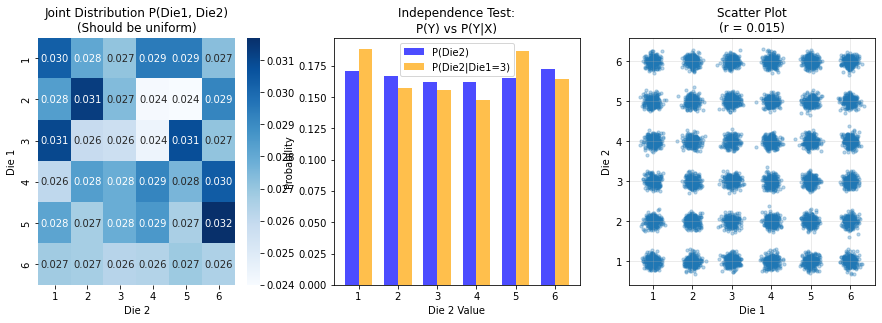

In [26]:
# Visualize independence
plt.figure(figsize=(15, 10))

# Panel 1: Joint distribution heatmap
plt.subplot(2, 3, 1)
joint_counts = np.zeros((6, 6))
for i in range(1, 7):
    for j in range(1, 7):
        joint_counts[i-1, j-1] = np.sum((die1 == i) & (die2 == j))

joint_probs = joint_counts / n_rolls
sns.heatmap(joint_probs, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=range(1,7), yticklabels=range(1,7))
plt.title('Joint Distribution P(Die1, Die2)\n(Should be uniform)')
plt.xlabel('Die 2')
plt.ylabel('Die 1')

# Panel 2: Marginal vs conditional
plt.subplot(2, 3, 2)
# P(Die2) vs P(Die2|Die1=3)
marginal_die2 = np.bincount(die2)[1:7] / n_rolls
conditional_die2_given_3 = np.bincount(die2[die1 == 3])[1:7] / np.sum(die1 == 3)

x = np.arange(1, 7)
width = 0.35
plt.bar(x - width/2, marginal_die2, width, label='P(Die2)', alpha=0.7, color='blue')
plt.bar(x + width/2, conditional_die2_given_3, width, 
        label='P(Die2|Die1=3)', alpha=0.7, color='orange')
plt.xlabel('Die 2 Value')
plt.ylabel('Probability')
plt.title('Independence Test:\nP(Y) vs P(Y|X)')
plt.legend()
plt.xticks(x)

# Panel 3: Scatter plot
plt.subplot(2, 3, 3)
# Add jitter for better visualization
die1_jitter = die1 + np.random.normal(0, 0.1, len(die1))
die2_jitter = die2 + np.random.normal(0, 0.1, len(die2))
plt.scatter(die1_jitter, die2_jitter, alpha=0.3, s=10)
plt.xlabel('Die 1')
plt.ylabel('Die 2')
plt.title(f'Scatter Plot\n(r = {corr_dice:.3f})')
plt.grid(True, alpha=0.3)

print("\n Key Insight: Independent dice rolls show:")
print("• Uniform joint distribution")
print("• P(Die2|Die1=k) = P(Die2) for any k")
print("• Zero correlation")
print("• No pattern in scatter plot")

 ROW 1: Linear Relationships (Study Hours vs GPA)
  Column 1: Target r = 1, Actual r = 1.000
  Column 2: Target r = 0.8, Actual r = 0.829
  Column 3: Target r = 0.4, Actual r = 0.350
  Column 4: Target r = 0, Actual r = -0.024
  Column 5: Target r = -0.4, Actual r = -0.446
  Column 6: Target r = -0.8, Actual r = -0.794
  Column 7: Target r = -1, Actual r = -1.000

 ROW 2: Perfect Linear Relationships (Different Slopes)
  Column 1: Slope = 2, Actual r = 0.990
  Column 2: Slope = 1, Actual r = 0.995
  Column 3: Slope = 0.5, Actual r = 0.977
  Column 4: Slope = 0.1, Actual r = 0.635
  Column 5: Slope = -0.1, Actual r = -0.717
  Column 6: Slope = -0.5, Actual r = -0.975
  Column 7: Slope = -2, Actual r = -0.990

 ROW 3: Zero Correlation BUT Dependent! (The Key Insight)
  Column 1: parabola, Actual r = 0.019
  Column 2: diamond, Actual r = -0.010
  Column 3: u_shape, Actual r = -0.047
  Column 4: sine, Actual r = -0.426
  Column 5: x_pattern, Actual r = 0.050
  Column 6: circle, Actual r = 

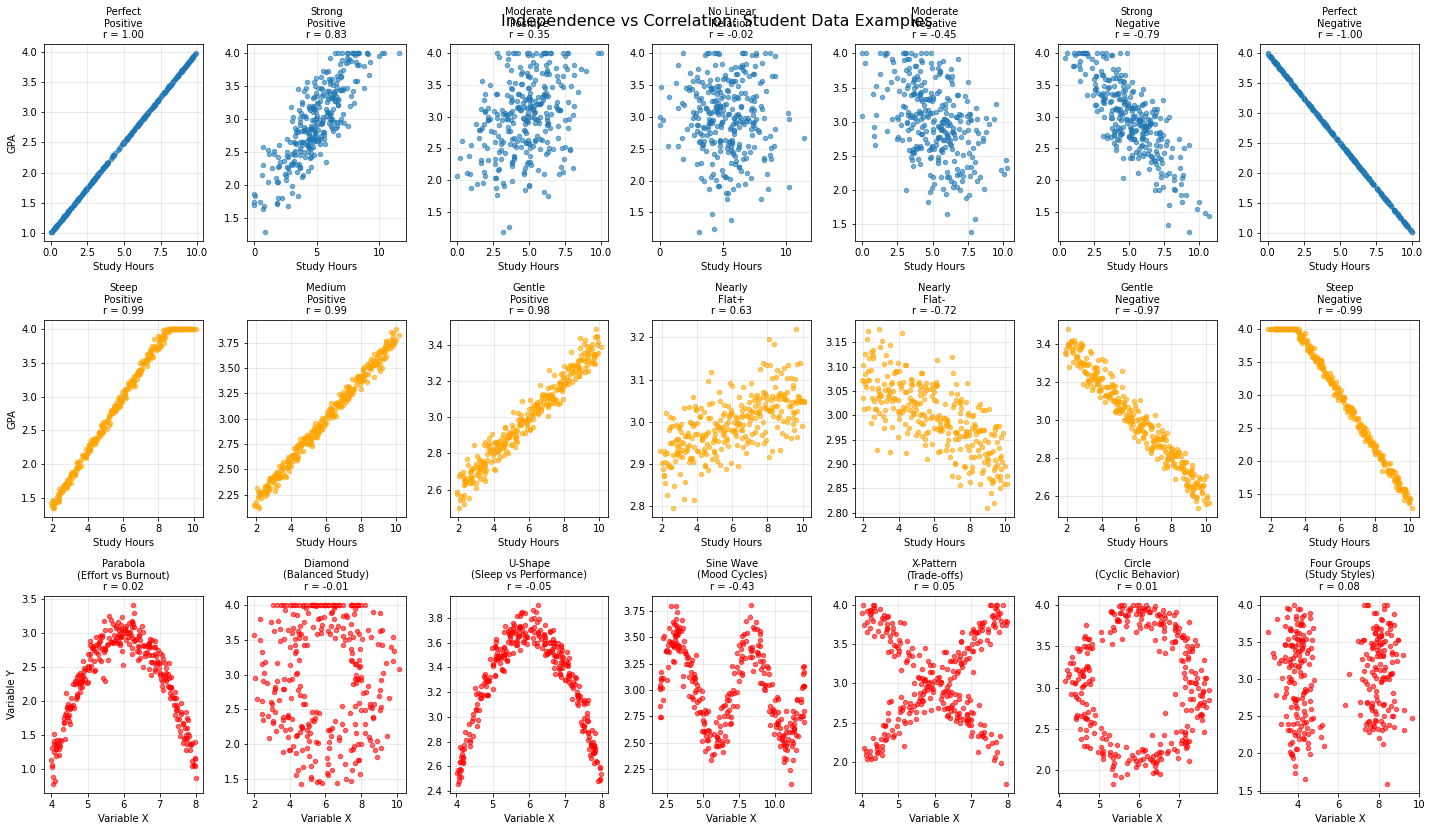


 KEY INSIGHTS:
 ROW 1: Shows how LINEAR correlation strength varies
   • As r approaches 0, the cloud becomes more circular
   • r = 0 means NO LINEAR relationship (but could still be dependent!)

 ROW 2: Shows that DIFFERENT SLOPES can have |r| ≈ 1
   • All show perfect LINEAR relationships
   • Slope doesn't affect correlation strength
   • What matters is how tightly points follow the line

 ROW 3: The CRUCIAL insight - Zero correlation ≠ Independence!
   • All have r ≈ 0 (no linear relationship)
   • BUT all show clear patterns/dependencies
   • Knowing X gives information about Y (they're dependent!)
   • Independence requires NO pattern at all

 FOR CAUSAL INFERENCE:
• Don't rely on correlation to test independence
• Use scatter plots, nonlinear tests, domain knowledge
• Randomization should break all patterns, not just linear ones
• Confounders may have nonlinear effects


In [27]:
# Independence Visualization: Correlation vs Dependence

from scipy.stats import pearsonr

np.random.seed(42)
n_points = 300

# Create the figure
fig, axes = plt.subplots(3, 7, figsize=(20, 12))
fig.suptitle('Independence vs Correlation: Student Data Examples', fontsize=16, y=0.95)

# Row 1: Linear relationships with different correlations
correlations = [1, 0.8, 0.4, 0, -0.4, -0.8, -1]
row1_titles = ['Perfect\nPositive', 'Strong\nPositive', 'Moderate\nPositive', 
               'No Linear\nRelation', 'Moderate\nNegative', 'Strong\nNegative', 'Perfect\nNegative']

print(" ROW 1: Linear Relationships (Study Hours vs GPA)")
for i, target_corr in enumerate(correlations):
    # Generate correlated data
    if abs(target_corr) == 1:
        # Perfect correlation
        study_hours = np.random.uniform(0, 10, n_points)
        if target_corr == 1:
            gpa = 0.3 * study_hours + 1.0  # Perfect positive
        else:
            gpa = -0.3 * study_hours + 4.0  # Perfect negative
    elif target_corr == 0:
        # Independent (circular cloud)
        study_hours = np.random.normal(5, 2, n_points)
        gpa = np.random.normal(3, 0.6, n_points)
    else:
        # Partial correlation using Cholesky decomposition
        cov_matrix = np.array([[4, target_corr * 2 * 0.6], 
                              [target_corr * 2 * 0.6, 0.36]])
        data = np.random.multivariate_normal([5, 3], cov_matrix, n_points)
        study_hours, gpa = data[:, 0], data[:, 1]
    
    # Clip to realistic ranges
    study_hours = np.clip(study_hours, 0, 12)
    gpa = np.clip(gpa, 0, 4)
    
    actual_corr = np.corrcoef(study_hours, gpa)[0, 1]
    
    axes[0, i].scatter(study_hours, gpa, alpha=0.6, s=20)
    axes[0, i].set_title(f'{row1_titles[i]}\nr = {actual_corr:.2f}', fontsize=10)
    axes[0, i].set_xlabel('Study Hours')
    if i == 0:
        axes[0, i].set_ylabel('GPA')
    axes[0, i].grid(True, alpha=0.3)
    
    print(f"  Column {i+1}: Target r = {target_corr}, Actual r = {actual_corr:.3f}")

print("\n ROW 2: Perfect Linear Relationships (Different Slopes)")
slopes = [2, 1, 0.5, 0.1, -0.1, -0.5, -2]
row2_titles = ['Steep\nPositive', 'Medium\nPositive', 'Gentle\nPositive', 
               'Nearly\nFlat+', 'Nearly\nFlat-', 'Gentle\nNegative', 'Steep\nNegative']

for i, slope in enumerate(slopes):
    # Perfect linear relationships with different slopes
    study_hours = np.linspace(2, 10, n_points) + np.random.normal(0, 0.1, n_points)
    gpa = slope * 0.2 * (study_hours - 6) + 3 + np.random.normal(0, 0.05, n_points)
    
    # Clip to realistic ranges
    study_hours = np.clip(study_hours, 0, 12)
    gpa = np.clip(gpa, 0, 4)
    
    actual_corr = np.corrcoef(study_hours, gpa)[0, 1]
    
    axes[1, i].scatter(study_hours, gpa, alpha=0.6, s=20, color='orange')
    axes[1, i].set_title(f'{row2_titles[i]}\nr = {actual_corr:.2f}', fontsize=10)
    axes[1, i].set_xlabel('Study Hours')
    if i == 0:
        axes[1, i].set_ylabel('GPA')
    axes[1, i].grid(True, alpha=0.3)
    
    print(f"  Column {i+1}: Slope = {slope}, Actual r = {actual_corr:.3f}")

print("\n ROW 3: Zero Correlation BUT Dependent! (The Key Insight)")
row3_titles = ['Parabola\n(Effort vs Burnout)', 'Diamond\n(Balanced Study)', 'U-Shape\n(Sleep vs Performance)', 
               'Sine Wave\n(Mood Cycles)', 'X-Pattern\n(Trade-offs)', 'Circle\n(Cyclic Behavior)', 'Four Groups\n(Study Styles)']

patterns = ['parabola', 'diamond', 'u_shape', 'sine', 'x_pattern', 'circle', 'four_groups']

for i, pattern in enumerate(patterns):
    if pattern == 'parabola':
        # Study pressure vs Performance (inverted U)
        study_pressure = np.random.uniform(-2, 2, n_points)
        performance = -study_pressure**2 + np.random.normal(0, 0.3, n_points)
        x_data, y_data = study_pressure + 6, (performance + 2) * 0.5 + 2
        
    elif pattern == 'diamond':
        # Balanced study approach
        angle = np.random.uniform(0, 2*np.pi, n_points)
        radius = np.random.uniform(0.5, 1.5, n_points)
        x_temp = radius * np.cos(angle)
        y_temp = radius * np.sin(angle)
        # Rotate 45 degrees to make diamond
        x_data = (x_temp + y_temp) * 2 + 6
        y_data = (x_temp - y_temp) * 0.8 + 3
        
    elif pattern == 'u_shape':
        # Sleep vs Performance (too little or too much is bad)
        sleep_hours = np.random.uniform(-2, 2, n_points)
        performance = sleep_hours**2 + np.random.normal(0, 0.3, n_points)
        x_data, y_data = sleep_hours + 6, (-performance + 4) * 0.3 + 2.5
        
    elif pattern == 'sine':
        # Seasonal mood/performance cycles
        time = np.random.uniform(0, 4*np.pi, n_points)
        mood = np.sin(time) + np.random.normal(0, 0.3, n_points)
        x_data, y_data = time * 0.8 + 2, mood * 0.5 + 3
        
    elif pattern == 'x_pattern':
        # Trade-off patterns
        choice = np.random.choice([0, 1], n_points)
        x_base = np.random.uniform(-2, 2, n_points)
        y_data_pos = x_base + np.random.normal(0, 0.3, n_points)
        y_data_neg = -x_base + np.random.normal(0, 0.3, n_points)
        x_data = x_base + 6
        y_data = np.where(choice, y_data_pos, y_data_neg) * 0.5 + 3
        
    elif pattern == 'circle':
        # Cyclic relationships
        angle = np.random.uniform(0, 2*np.pi, n_points)
        radius = 1.5 + np.random.normal(0, 0.2, n_points)
        x_data = radius * np.cos(angle) + 6
        y_data = radius * np.sin(angle) * 0.6 + 3
        
    else:  # four_groups
        # Distinct study style groups
        group = np.random.choice([0, 1, 2, 3], n_points)
        centers_x = [4, 8, 4, 8]
        centers_y = [2.5, 2.5, 3.5, 3.5]
        x_data = [np.random.normal(centers_x[g], 0.5) for g in group]
        y_data = [np.random.normal(centers_y[g], 0.3) for g in group]
    
    # Ensure realistic ranges
    x_data = np.clip(x_data, 0, 12)
    y_data = np.clip(y_data, 0, 4)
    
    actual_corr = np.corrcoef(x_data, y_data)[0, 1]
    
    axes[2, i].scatter(x_data, y_data, alpha=0.6, s=20, color='red')
    axes[2, i].set_title(f'{row3_titles[i]}\nr = {actual_corr:.2f}', fontsize=10)
    axes[2, i].set_xlabel('Variable X')
    if i == 0:
        axes[2, i].set_ylabel('Variable Y')
    axes[2, i].grid(True, alpha=0.3)
    
    print(f"  Column {i+1}: {pattern}, Actual r = {actual_corr:.3f}")

plt.tight_layout()
plt.show()

print("\n KEY INSIGHTS:")
print("=" * 40)
print(" ROW 1: Shows how LINEAR correlation strength varies")
print("   • As r approaches 0, the cloud becomes more circular")
print("   • r = 0 means NO LINEAR relationship (but could still be dependent!)")
print("")
print(" ROW 2: Shows that DIFFERENT SLOPES can have |r| ≈ 1")
print("   • All show perfect LINEAR relationships")
print("   • Slope doesn't affect correlation strength")
print("   • What matters is how tightly points follow the line")
print("")
print(" ROW 3: The CRUCIAL insight - Zero correlation ≠ Independence!")
print("   • All have r ≈ 0 (no linear relationship)")
print("   • BUT all show clear patterns/dependencies")
print("   • Knowing X gives information about Y (they're dependent!)")
print("   • Independence requires NO pattern at all")

print("\n FOR CAUSAL INFERENCE:")
print("• Don't rely on correlation to test independence")
print("• Use scatter plots, nonlinear tests, domain knowledge")
print("• Randomization should break all patterns, not just linear ones")
print("• Confounders may have nonlinear effects")

## Assignment 1 is out. Hope everyone has groups. Anyone still left!!!!


## Office Hours Monday 3PM - 4PM  Room No - 244
or dropin your questions at vka244@nyu.edu
